# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matches = pd.read_csv('data/matches.csv', parse_dates=['date'])
deliveries = pd.read_csv('data/deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Lets look at the shape of each dataframes

In [5]:
print('There are {} rows and {} columns on deliveries dataframe.'.format(deliveries.shape[0], deliveries.shape[1]))
print('There are {} rows and {} columns on matches dataframe.'.format(matches.shape[0], matches.shape[1]))

There are 179078 rows and 21 columns on deliveries dataframe.
There are 756 rows and 18 columns on matches dataframe.


#### 

# Data wrangling

There's a lot of missing values on umpire3, player_dismissed, dismissal_kind and fielder. It's normal to have no players being ejected from a match. And some matches don't have neccesarily need for the 3rd umpire. So we can leave the null values on those columns as is.

**To do:**

1. How to deal with missing values in city?
2. There are 372 columns with no winner and players of the match indicated, how to deal with this?
3. There are 500 rows with no umpire1 and umpire2. Given those, is it an official match? What can we do with this?

### Matches dataframe

#### Lets look at the matches dataframe.

In [6]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#### Lets look at the rows with null in city column.

In [7]:
matches.loc[matches['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


We can replace city with NaN with Dubai since all of those NaN are just the matches that happened in Dubai International Cricket Stadium.

In [8]:
matches.loc[matches.venue == 'Dubai International Cricket Stadium', 'city'] = 'Dubai'

All of the null values in city is the match that happenned in Dubai International Cricket Stadium.

#### Lets look at the rows with null in winner and player_of_match column.


In [9]:
matches.loc[matches['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [10]:
matches.loc[matches['player_of_match'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


We can see that the null values on that columns are identical. Now notice that on the result column, rows are indicated to have no result. So I'm just going to delete those rows no.

In [11]:
matches.loc[matches['result'] == 'no result']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


#### Drop row with no result

In [12]:
matches.drop(matches[matches['result'] == 'no result'].index, inplace=True)

#### Save cleaned matches dataframe to a csv file

In [29]:
matches.to_csv('data/matches-cleaned.csv')

### Deliveries dataframe

In [13]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

Since it is normal to have matches being evicted in the game, we can leave the data as is.

#### Save cleaned deliveries dataframe to a csv file

In [30]:
deliveries.to_csv('data/deliveries-cleaned.csv')

#### Merge the two dataframes
I used inner join to merged the two dataframes.

In [15]:
data = matches.merge(deliveries, left_on='id', right_on='match_id')

In [16]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Lets look at the different data types and count the number null values in each column.

In [17]:
# different datatypes in the merged dataframe
dataTypes = data.dtypes 

# count of null values in each columns
nullCnt = data.isnull().sum().sort_values(ascending=False) 

# concatenate
dataProperty = pd.concat([dataTypes, nullCnt], axis=1)

# rename columns
columns = ['data type', 'count of nulls']
dataProperty.columns = columns

# sort by count of nulls
dataProperty.sort_values(by='count of nulls', ascending=False, inplace=True)
dataProperty

,data type,count of nulls
fielder,object,172278
dismissal_kind,object,169895
player_dismissed,object,169895
umpire3,object,150391
umpire2,object,500
umpire1,object,500
is_super_over,int64,0
ball,int64,0
batsman,object,0
non_striker,object,0


Seems all the data types are good.

Let's look at the size of the resulting dataframe after merging.

In [28]:
data.shape

(178706, 39)

The resulting dataframe has the same size that of the deliveries dataframe. I'm going to save the resulting dataframe into a csv file so I can later on do some analysis in PowerBI.

In [19]:
data.to_csv('data/merged_data.csv')

## 1. What are the most successful teams?
I decided to label the most successful team with the highest number of wins.

In [20]:
# count the win by each team
sucTeam = matches['winner'].value_counts().to_frame()

# rename column
sucTeam.rename(columns={'winner':'Count of Wins'}, inplace=True)
sucTeam.head()

,Count of Wins
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82


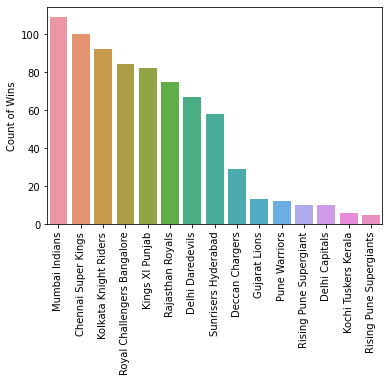

In [21]:
# visualize
sns.barplot(x=sucTeam.index, y='Count of Wins', data=sucTeam)
plt.xticks(rotation='vertical')
plt.show()

In [22]:
print('The most successful team is {}.'.format(sucTeam.index[0]))

The most successful team is Mumbai Indians.


## Who are the most successful players? 
Count the how many times a player became the player of the match. The players with most number of times that become the player of the match are the most successful ones.

In [23]:
# count how many times the player become the player of the match
playerOfMatch = matches['player_of_match'].value_counts().to_frame()

# rename column
playerOfMatch.rename(columns={'player_of_match':'Player of the Match Count'}, inplace=True)
playerOfMatch.head()

,Player of the Match Count
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
DA Warner,17
RG Sharma,17


#### Select top 10 players

In [24]:
topPlayers = playerOfMatch.iloc[:10]

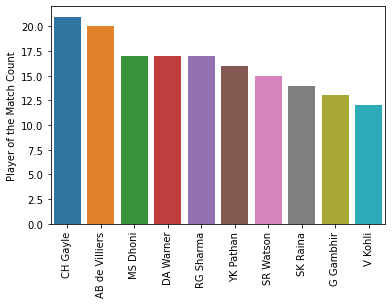

In [25]:
# visualize
sns.barplot(x=topPlayers.index, y='Player of the Match Count', data=topPlayers)
plt.xticks(rotation='vertical')
plt.show()

In [26]:
print('The most successful player is {}.'.format(playerOfMatch.index[0]))

The most successful player is CH Gayle.


## What are the factors contributing win or loss of a team?

**To do:**

1. Does being in the homecourt have an advantage?
2. Does winning the toss coin has impact on the result of the match?
3. After winning the toss coin, does choosing to bat or the field has effect on the winning a match?

In [27]:
batsmanGrp = deliveries.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen = batsmanGrp["batsman_runs"].sum().reset_index()
batsmen

,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16
1,1,1,Sunrisers Hyderabad,DA Warner,14
2,1,1,Sunrisers Hyderabad,DJ Hooda,16
3,1,1,Sunrisers Hyderabad,MC Henriques,52
4,1,1,Sunrisers Hyderabad,S Dhawan,40
...,...,...,...,...,...
11330,11415,2,Chennai Super Kings,MS Dhoni,2
11331,11415,2,Chennai Super Kings,RA Jadeja,9
11332,11415,2,Chennai Super Kings,SK Raina,9
11333,11415,2,Chennai Super Kings,SN Thakur,2


## Suggest teams or players a company should endorse for its products.